# Actividad: Clasificación de imágenes naturales

¿Podemos clasificar imágenes naturales usando redes neuronales convolucionales?

En esta tarea usaremos la base de datos [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Responda las preguntas y realice las actividades en cada uno de los bloques

Entregas al correo phuijse@inf.uach.cl hasta el Viernes 27, 11:20 AM

Se trabajará en grupos de dos personas: se entrega un notebook completo por grupo

### Base de datos

Descargue la base de datos usando `torchvision`

- ¿Cuántas categorías existen? 
- ¿Cuántos ejemplos hay por categoría?
- ¿Cúantos ejemplos hay en el conjunto de entrenamiento? ¿Cúantos hay en el de test?
- ¿De que tamaño son las imágenes?
- Muestre 5 ejemplos seleccionados aleatoriamente de cada categoría

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10_train = torchvision.datasets.CIFAR10(root='data', train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
cifar10_test = torchvision.datasets.CIFAR10(root='data', train=False, download=True,
                                           transform=torchvision.transforms.ToTensor())
display(cifar10_train)
display(cifar10_test)

Files already downloaded and verified
Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

http://www.cs.toronto.edu/~kriz/cifar.html

- Existen 10 categorias: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, y truck
- Hay 6000 ejemplos por categoria
- 50000 y 10000 respectivamente 
- Imagenes de 32x32 a color
- 

In [3]:
def elegance (nimg):
    p = int(nimg*3)
    index = np.random.permutation(len(cifar10_train))[:p]
    l0=[]
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    l8 = []
    l9 = []
    idx = []
    for i in range(p):
        if (cifar10_train[index[i]][1]==0 and len(l0)<5):
            l0.append(index[i])
        if (cifar10_train[index[i]][1]==1 and len(l1)<5):
            l1.append(index[i])
        if (cifar10_train[index[i]][1]==2 and len(l2)<5):
            l2.append(index[i])
        if (cifar10_train[index[i]][1]==3 and len(l3)<5):
            l3.append(index[i])
        if (cifar10_train[index[i]][1]==4 and len(l4)<5):
            l4.append(index[i])
        if (cifar10_train[index[i]][1]==5 and len(l5)<5):
            l5.append(index[i])
        if (cifar10_train[index[i]][1]==6 and len(l6)<5):
            l6.append(index[i])
        if (cifar10_train[index[i]][1]==7 and len(l7)<5):
            l7.append(index[i])
        if (cifar10_train[index[i]][1]==8 and len(l8)<5):
            l8.append(index[i])
        if (cifar10_train[index[i]][1]==9 and len(l9)<5):
            l9.append(index[i])
        if (i >= nimg*2):
            if (len(l0)==5 and len(l1)==5 and len(l2)==5 and len(l3)==5 and len(l4)==5 and len(l5)==5 and 
                len(l6)==5 and len(l7)==5 and len(l8)==5 and len(l9)==5):
                print('dear god it works')
                idx.append(l0)
                idx.append(l1)
                idx.append(l2)
                idx.append(l3)
                idx.append(l4)
                idx.append(l5)
                idx.append(l6)
                idx.append(l7)
                idx.append(l8)
                idx.append(l9)
                return idx
                break

In [4]:
nimg = 5*10
idx = elegance(nimg)

dear god it works


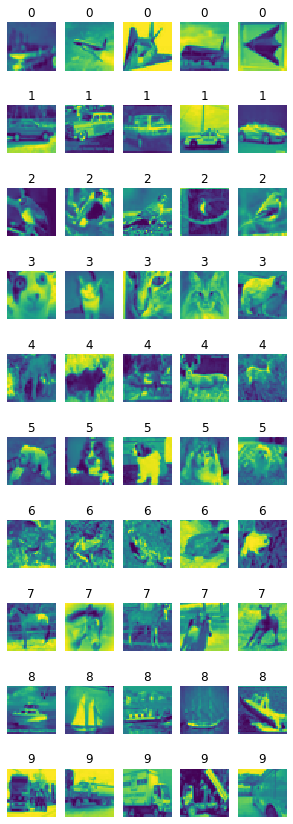

In [5]:
fig, ax = plt.subplots(10, 5, figsize=(5,15))#figsize=(10, 3), tight_layout=True)
for i in range(10):
    for j in range(5):
        image, label = cifar10_train[idx[i][j]]
        ax[i][j].imshow(image[0, :, :].numpy(), cmap=None)
        ax[i][j].axis('off');
        ax[i][j].set_title(label)

## Dataloaders

Construya `dataloaders` para el conjunto de entrenamiento y validación a partir del dataset `cifar10_train`

Construya un `dataloader` para el conjunto de test a partir del dataset `cifar10_test`

Use `shuffling` y tamaño de batch 32 para el conjunto de entrenamiento

In [6]:
from torch.utils.data import Subset, DataLoader

## Red neuronal convolucional

Construya una clase que herede de `torch.nn.Module` y que implemente una red neuronal convolucional

Tome como base la arquitectura [Lenet5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 
- Tres capas convolucionales cada una seguida de una capa de max-pooling
- Dos capas completamente conectadas
- Función de activación ReLU en todas las capas excepto en la última 
- Función de costo `CrossEntropyLoss`
- Optimizador `Adam`

Entrene su red en la base de datos CIFAR10
- Ajuste los parámetros con el conjunto de entrenamiento
- Evite el sobreajuste y calibre los hyper-parámetros en el conjunto de validación
- Muestre la calidad de su modelo evaluando en el conjunto de prueba

## Aumentación de datos

Use `torchvision.transforms` para implementar una serie de transformaciones que aumenten el dataset de entrenamiento

Compare los resultados de la red entrenada en datos aumentados con la red entrenada en el conjunto regular

## Propuestos (bonus)

- Implemente una arquitectura de tipo [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networ)
- Pruebe la eficacia de Dropout o Regularización L2 en los pesos